# Lecture-06-4 Transfer Matrix Method
* author : Wei-Kai Lee
* Data : 2019/12/18

In [1]:
# python module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
# optics module
from optics.TransferMatrix import cal_r_tau_from_structure, cal_field_z, plot_fun, cal_field_z_2
from optics.PlaneWave import cal_s, cal_p

In this notebook, we are going to calculate the components of the electric field and the magnetic field.

In [3]:
n1, n2 = 1.5, 1.0
thickness_list = [0, 0]

theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
wavelength = 520
e0, mu0 = 1.0, 1.0
z_list = np.linspace(-520, 520, 1000)

# wave properties
c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

In [4]:
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
er_list = [n1**2, n2**2] 
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z_2( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z_2( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

As we learned in the previous lecture, because of the refraction, $k_z$ in different materials are different and hence, the corresponding of $\hat{\textbf{s}}$ and $\hat{\textbf{p}}$ might also different. 

As a result, in the following block, we will construct functions to calculate the $\hat{\textbf{s}}$ and $\hat{\textbf{p}}$ in each layer based on **cal_s** and **cal_p** in module **optics.PlaneWave**

In [5]:
def cal_s_list(kx, ky, kz_list):
    # kx : x component of the wave vector
    # ky : y component of the wave vector
    # kz_list : a 2D list of z component of the wave vector in each layer (calculated by cal_kz_list)
    #           the shape of kz_list = (# of material, # of kx)
    sx_list = np.zeros( kz_list.shape, dtype=np.complex )
    sy_list = np.zeros( kz_list.shape, dtype=np.complex )
    sz_list = np.zeros( kz_list.shape, dtype=np.complex )
    for ii in range( kz_list.shape[0] ):
        sx_list[ii, :], sy_list[ii, :], sz_list[ii, :] = cal_s(kx, ky, kz_list[ii, :])
    return sx_list, sy_list, sz_list
def cal_p_list(kx, ky, kz_list):
    # kx : x component of the wave vector
    # ky : y component of the wave vector
    # kz_list : a 2D list of z component of the wave vector in each layer (calculated by cal_kz_list)
    #           the shape of kz_list = (# of material, # of kx)
    px_list = np.zeros( kz_list.shape, dtype=np.complex )
    py_list = np.zeros( kz_list.shape, dtype=np.complex )
    pz_list = np.zeros( kz_list.shape, dtype=np.complex )
    for ii in range( kz_list.shape[0] ):
        px_list[ii, :], py_list[ii, :], pz_list[ii, :] = cal_p(kx, ky, kz_list[ii, :])
    return px_list, py_list, pz_list

In [6]:
spx_z_list, spy_z_list, spz_z_list = cal_s_list(kx, ky, kz_list) # positive s vector
snx_z_list, sny_z_list, snz_z_list = cal_s_list(kx, ky,-kz_list) # negative s vector
ppx_z_list, ppy_z_list, ppz_z_list = cal_p_list(kx, ky, kz_list) # positive p vector
pnx_z_list, pny_z_list, pnz_z_list = cal_p_list(kx, ky,-kz_list) # negative p vector
print('Material numer : {0}'.format( spx_z_list.shape[0] ) )
print('Theta numer : {0}'.format( spx_z_list.shape[1] ) )

Material numer : 2
Theta numer : 3


Don't forget **k_list** is a variable with size of the number of the materials and **kz_list** is a variable with shape of ( # of material, # of $k_x$). Besides, **LayerIndex** is a list to specify the material index at each z. Now, we are going to calculate all the field values in each position, we need to calculate all the $k_z$ components in all z based on **kz_list** and **LayerIndex**.

In [7]:
kz_z_list = kz_list[LayerIndex]
print( 'The shape of kz_z_list is correct or not : ', kz_z_list.shape == (z_list.size, theta1.size) )

The shape of kz_z_list is correct or not :  True


(-180, 180)

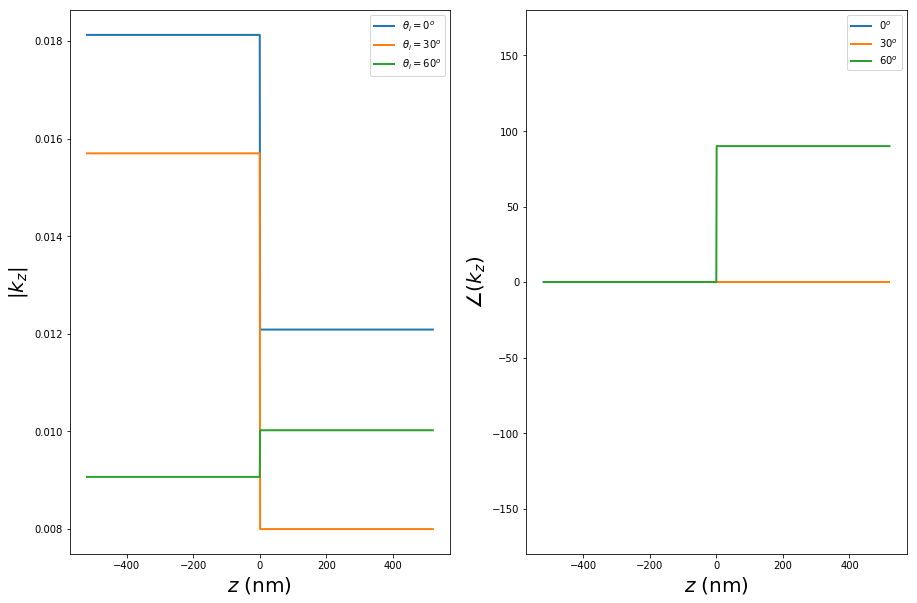

In [9]:
fig, axes = plt.subplots( 1, 2)
plt.rcParams['figure.figsize'] = [15, 10]

for jj in range( theta1.size ):
    axes[0].plot( z_list, np.abs( kz_z_list[:,jj] ), linewidth=2.0)
    axes[1].plot( z_list, np.angle( kz_z_list[:,jj], deg=True ), linewidth=2.0)

axes[0].set_xlabel(r'$z$ (nm)', fontsize=20)
axes[0].set_ylabel(r'$|k_z|$', fontsize=20)
axes[0].legend([r'$\theta_i = 0^o$', r'$\theta_i = 30^o$', r'$\theta_i = 60^o$'], fontsize=10)

axes[1].set_xlabel(r'$z$ (nm)', fontsize=20)
axes[1].set_ylabel(r'$\angle(k_z)$', fontsize=20)
axes[1].legend([r'$0^o$', r'$30^o$', r'$60^o$'], fontsize=10)
axes[1].set_ylim(-180, 180)

In **Lecture 6-1**

<font size="4">$$\hat{\textbf{s}} = \left( \begin{array}{c} -k_y/k_t \\ k_x/k_t \\ 0 \end{array} \right) - (1)$$</font>
<font size="4">$$\hat{\textbf{p}}_{\pm} = \left( \begin{array}{c} \mp \frac{k_zk_x}{kk_t} \\ \mp \frac{k_zk_y}{kk_t} \\ \frac{k_t}{k} \end{array} \right) - (2)$$</font>

### TE mode
<font size="4">$$\textbf{E}_{\textbf{s}}(z) = E_{\textbf{s},+}(z)\hat{\textbf{s}} + E_{\textbf{s},-}(z)\hat{\textbf{s}} - (2)$$</font>
<font size="4">$$\textbf{H}_{\textbf{s}}(z) = \frac{kE_{\textbf{s},+}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_+ + \frac{kE_{\textbf{s},-}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_- = \sqrt{\frac{\epsilon_0\epsilon_r}{\mu_0\mu_r}}E_{\textbf{s},+}(z)\hat{\textbf{p}}_+ + \sqrt{\frac{\epsilon_0\epsilon_r}{\mu_0\mu_r}}E_{\textbf{s},-}(z)\hat{\textbf{p}}_- - (3)$$</font>

### TM mode
<font size="4">$$\textbf{E}_{\textbf{p}}(z) = \frac{-kH_{\textbf{p},+}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_+ + \frac{-kH_{\textbf{p},-}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_-= -\sqrt{\frac{\mu_0\mu_r}{\epsilon_0\epsilon_r}}H_{\textbf{p},+}(z)\hat{\textbf{p}}_+ - \sqrt{\frac{\mu_0\mu_r}{\epsilon_0\epsilon_r}}H_{\textbf{p},-}(z)\hat{\textbf{p}}_- - (4)$$</font>
<font size="4">$$\textbf{H}_{\textbf{p}}(z) = H_{\textbf{p},+}(z)\hat{\textbf{s}} + H_{\textbf{p},-}(z)\hat{\textbf{s}} - (5)$$</font>

Then, we can calculate all the field elements.

In [10]:
VectorNamedTuple = collections.namedtuple('VectorNamedTuple', ['vx','vy','vz'])
def vector_zeros( shape, dtype ):
    vx = np.zeros( shape, dtype=dtype )
    vy = np.zeros( shape, dtype=dtype )
    vz = np.zeros( shape, dtype=dtype )
    return VectorNamedTuple( vx, vy, vz )

In [11]:
sp = VectorNamedTuple( *cal_s_list(kx, ky, kz_list) )
print('s_+,x : ', sp.vx)
print('s_+,y : ', sp.vy)
print('s_+,z : ', sp.vz)

s_+,x :  [[ 1.+0.j -0.+0.j -0.+0.j]
 [ 1.+0.j -0.+0.j -0.+0.j]]
s_+,y :  [[0.+0.j 1.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 1.+0.j]]
s_+,z :  [[0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]


In [12]:
pp = VectorNamedTuple( *cal_p_list(kx, ky, kz_list) )
print('p_+,x : ', pp.vx)
print('p_+,y : ', pp.vy)
print('p_+,z : ', pp.vz)

p_+,x :  [[ 0.        +0.j        -0.8660254 +0.j        -0.5       +0.j       ]
 [ 0.        +0.j        -0.66143783+0.j        -0.        -0.8291562j]]
p_+,y :  [[ 1.+0.j -0.+0.j -0.+0.j]
 [ 1.+0.j -0.+0.j -0.+0.j]]
p_+,z :  [[0.        +0.j 0.5       +0.j 0.8660254 +0.j]
 [0.        +0.j 0.75      +0.j 1.29903811+0.j]]


In [13]:
pn = VectorNamedTuple( *cal_p_list(kx, ky, -kz_list) )
print('p_-,x : ', pn.vx)
print('p_-,y : ', pn.vy)
print('p_-,z : ', pn.vz)

p_-,x :  [[0.        +0.j        0.8660254 +0.j        0.5       +0.j       ]
 [0.        +0.j        0.66143783+0.j        0.        +0.8291562j]]
p_-,y :  [[-1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j]]
p_-,z :  [[0.        +0.j 0.5       +0.j 0.8660254 +0.j]
 [0.        +0.j 0.75      +0.j 1.29903811+0.j]]


In [14]:
def cal_TE_Field_xyz_zlist(Ep_zlist, En_zlist, kx, ky, kz_list, LayerIndex, er_list = None, mur_list = None, e0=1.0, mu0=1.0):
    # Ep_zlist : the strength of the electric field in TE　mode propagating toward +z
    # En_zlist : the strength of the electric field in TE　mode propagating toward +z
    # kx    : x component of wave vector
    # ky    : y component of wave vector
    # kz_list : a 2D list of z component of the wave vector in each layer (calculated by cal_kz_list)
    #           the shape of kz_list = (# of material, # of kx)\
    # LayerIndex : correpsonding material index of z position
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    # e0 : permittivity in vacuum
    # mu0 : permeability in vacuum
    
    # the return values are a VectorNamedTuple
    
    # default process
    er_list = np.ones( kz_list.shape[0], dtype=np.complex) if (er_list is None) else np.array( er_list, dtype = np.complex )
    mur_list = np.ones( kz_list.shape[0], dtype=np.complex) if (mur_list is None) else np.array( mur_list, dtype = np.complex )

    # container preparation
    Ep = vector_zeros( Ep_zlist.shape, dtype=np.complex )
    En = vector_zeros( Ep_zlist.shape, dtype=np.complex )
    Hp = vector_zeros( Ep_zlist.shape, dtype=np.complex )
    Hn = vector_zeros( Ep_zlist.shape, dtype=np.complex )

    # calculate the s+, s-, p+, and p- directions 
    sp_zlist = VectorNamedTuple( *cal_s_list(kx, ky, kz_list) ) # positive s vector
    sn_zlist = VectorNamedTuple( *cal_s_list(kx, ky,-kz_list) ) # negative s vector
    pp_zlist = VectorNamedTuple( *cal_p_list(kx, ky, kz_list) ) # positive p vector
    pn_zlist = VectorNamedTuple( *cal_p_list(kx, ky,-kz_list) ) # negative p vector
    # calculate 
    factor = np.sqrt( (e0 * er_list[ LayerIndex ]) / (mu0 * mur_list[ LayerIndex ]) )
    for xx in range(3): # vx, vy, vz
        # electric field
        Ep[xx][:,:] = Ep_zlist * sp_zlist[xx][ LayerIndex ]
        En[xx][:,:] = En_zlist * sn_zlist[xx][ LayerIndex ]
        # magnetic field
        Hp[xx][:,:] = Ep_zlist*factor[:,np.newaxis] * pp_zlist[xx][ LayerIndex ]
        Hn[xx][:,:] = En_zlist*factor[:,np.newaxis] * pn_zlist[xx][ LayerIndex ]
    return Ep, En, Hp, Hn
def cal_TM_Field_xyz_zlist(Hp_zlist, Hn_zlist, kx, ky, kz_list, LayerIndex, er_list = None, mur_list = None, e0=1.0, mu0=1.0):
    # Hp_zlist : the strength of the magnetic field in TE　mode propagating toward +z
    # Hn_zlist : the strength of the magnetic field in TE　mode propagating toward +z
    # kx    : x component of wave vector
    # ky    : y component of wave vector
    # kz_list : a 2D list of z component of the wave vector in each layer (calculated by cal_kz_list)
    #           the shape of kz_list = (# of material, # of kx)\
    # LayerIndex : correpsonding material index of z position
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    # e0 : permittivity in vacuum
    # mu0 : permeability in vacuum

    # the return values are a VectorNamedTuple

    Hp, Hn, Ep, En = cal_TE_Field_xyz_zlist(Hp_zlist, Hn_zlist, kx, ky, kz_list, LayerIndex, er_list = mur_list, mur_list = er_list, e0=mu0, mu0=e0)
    Ep = VectorNamedTuple( *[-Epx for Epx in Ep] )
    En = VectorNamedTuple( *[-Enx for Enx in En] )
    return Ep, En, Hp, Hn

In [15]:
Ep_TE, En_TE, Hp_TE, Hn_TE = \
    cal_TE_Field_xyz_zlist(Ep_zlist, En_zlist, kx, ky, kz_list, LayerIndex, er_list=er_list,e0=e0, mu0=mu0)
Ep_TM, En_TM, Hp_TM, Hn_TM = \
    cal_TM_Field_xyz_zlist(Hp_zlist, Hn_zlist, kx, ky, kz_list, LayerIndex, er_list=er_list,e0=e0, mu0=mu0)

In [16]:
def plot_field_z_fun(vx_list, vy_list, vz_list, z_list, legend_list = [], vecname = 'v'):
    xyz_str = ['x', 'y', 'z']
    v_listlist = [ vx_list, vy_list, vz_list ]
    
    fig, axes = plt.subplots( len(v_listlist), 2)
    plt.rcParams['figure.figsize'] = [15, 10]
    for ii in range( len(v_listlist) ):
        # plot x
        for jj in range( v_listlist[ii].shape[1] ):
            axes[ii,0].plot( z_list, np.abs( v_listlist[ii][:,jj] ), linewidth=2.0)
            axes[ii,1].plot( z_list, np.angle( v_listlist[ii][:,jj], deg=True ), linewidth=2.0)

        #axes[ii,0].set_xlabel(r'$z$ (nm)', fontsize=20)
        axes[ii,0].set_ylabel(r'$|{0}_{1}|$'.format(vecname, xyz_str[ii]), fontsize=20)
        axes[ii,0].legend(legend_list, fontsize=10)

        #axes[ii,1].set_xlabel(r'$z$ (nm)', fontsize=20)
        axes[ii,1].set_ylabel(r'$\angle ({0}_{1})$'.format(vecname, xyz_str[ii]), fontsize=20)
        axes[ii,1].legend(legend_list, fontsize=10)


### TE mode

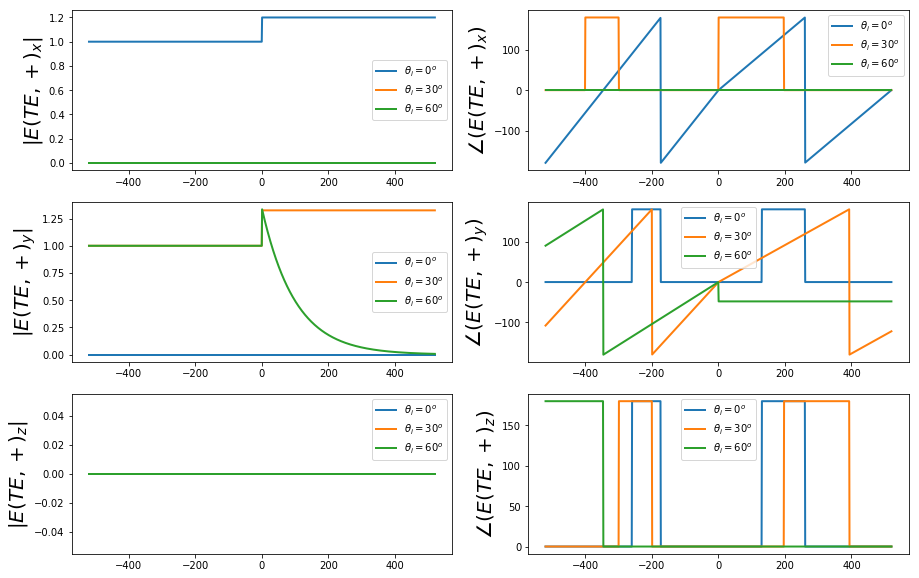

In [17]:
legend_list = [ r'$\theta_i = {0:>.0f}^o$'.format(ang/np.pi*180) for ang in theta1]
plot_field_z_fun(Ep_TE.vx, Ep_TE.vy, Ep_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TE,+)')

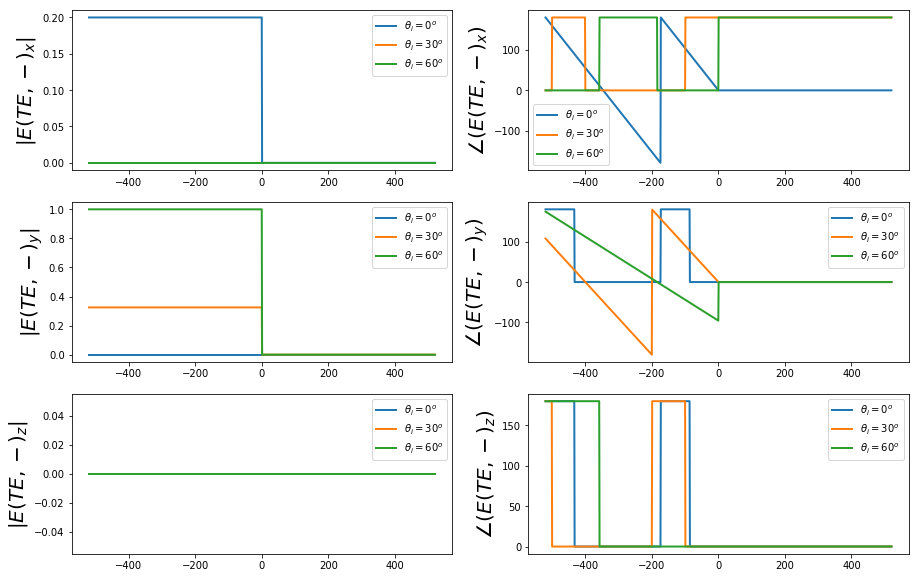

In [18]:
plot_field_z_fun(En_TE.vx, En_TE.vy, En_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TE,-)')

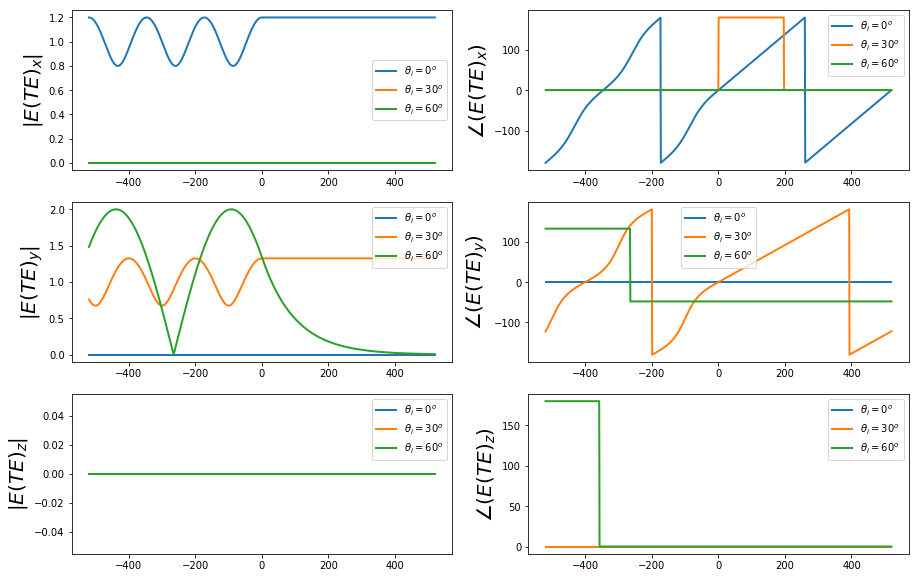

In [19]:
plot_field_z_fun(Ep_TE.vx+En_TE.vx, Ep_TE.vy+En_TE.vy, Ep_TE.vz+En_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TE)')

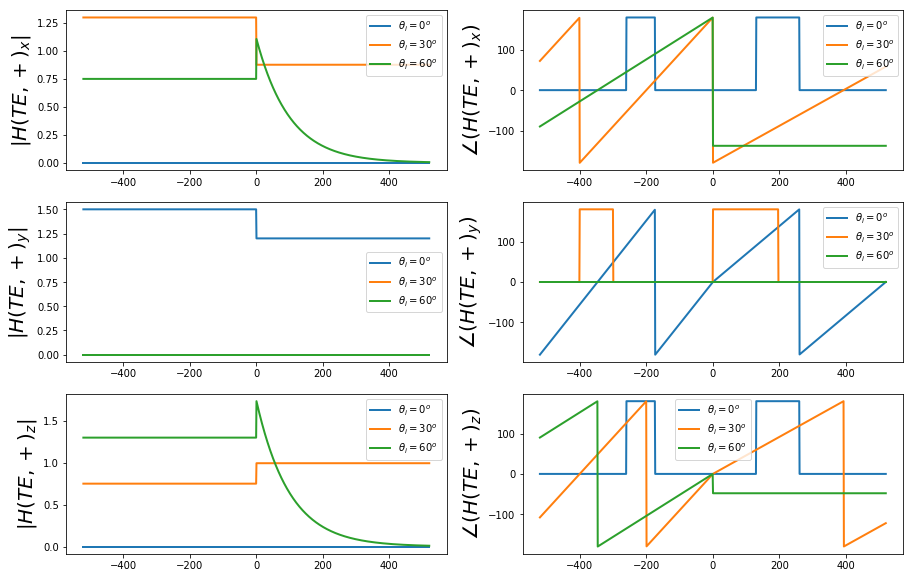

In [20]:
plot_field_z_fun(Hp_TE.vx, Hp_TE.vy, Hp_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TE,+)')

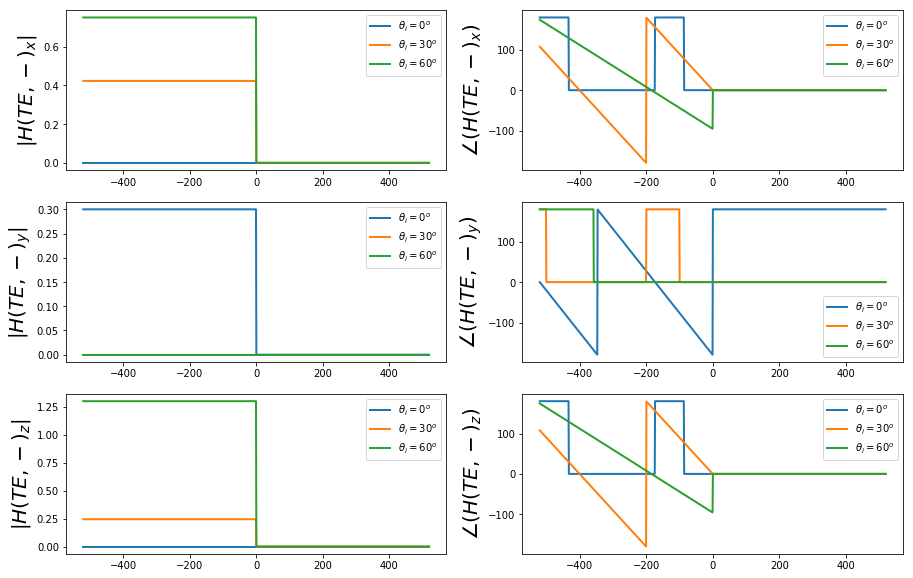

In [21]:
plot_field_z_fun(Hn_TE.vx, Hn_TE.vy, Hn_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TE,-)')

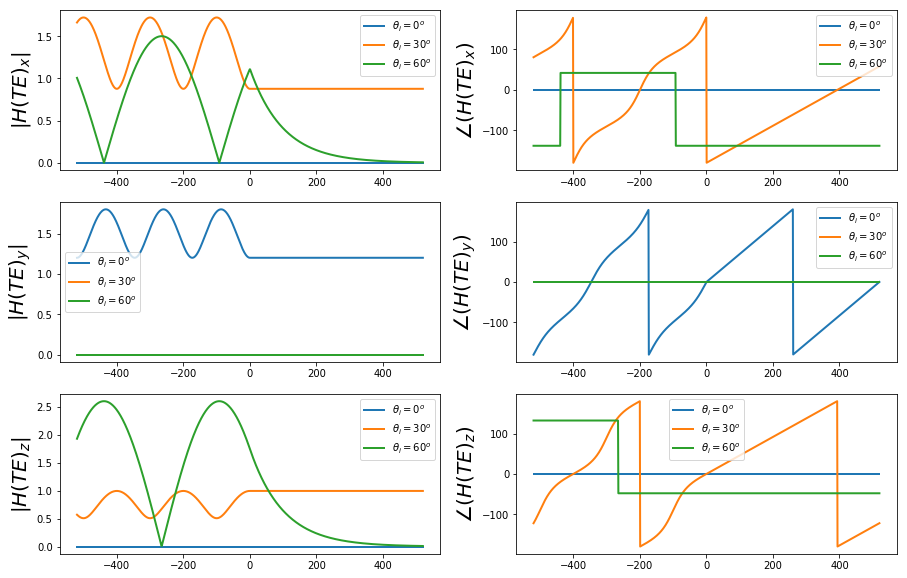

In [22]:
plot_field_z_fun(Hp_TE.vx+Hn_TE.vx, Hp_TE.vy+Hn_TE.vy, Hp_TE.vz+Hn_TE.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TE)')

It should be noticed that, from boundary condition, all tagential components (x,y) of total $\textbf{E}$ and all the components of $\textbf{H}$ (x,y,z) are continuous on the bonundary. It should be noticed that the +z and -z are not necessary continuous on the boundary. Besides, in -z wave, it is obvious that there is no -z wave in material 2 as the assumption. In the phase diagram, because $k_z$ is different in different material, you can see there are two different slope along z direction, which would correspond to Snell's Law in **Lectue 2**. On the other hand, the slope of phase of the +z wave is positive and the slope of the -z wave is negative because the sign of $k_z$ of +z and -z wave are different. Besides, when $\theta_i > \theta_c$, in material 2, the wave is basically an exponential decay and in material 1, the amplitude of the field can reach zero, which would correspond to a pure standing wave. 

Interestingly, the wavelength of different $\theta_i$ is also different. As in **Lecture 2**, the wavelength along z axis, $\lambda_z$, equals to $2\pi/k_z$. Then as $\theta_i$ increasing, $k_z$ would become smaller and then $\lambda_z$ becomes longer. In the next block, we'll show you the $E_x$ on xz plane.

===================================================================================================================
<img src="Lecture-6-Material/Fig-S1.jpg" width="300">
$$Fig. S1. $$

===================================================================================================================


In [23]:
def add_xy_term(v_zlist, x_list, y_list, z_list, kx, ky, wt = 0.0):
    exp_term = np.array( [ np.exp( 1j*(kx[ii]*x_list +ky[ii]*y_list-wt ) ) for ii in range(kx.size) ], dtype=np.complex )
    F_x = np.zeros( ( kx.size, z_list.size, x_list.size ), dtype=np.complex ) 
    F_y = np.zeros( ( kx.size, z_list.size, x_list.size ), dtype=np.complex ) 
    F_z = np.zeros( ( kx.size, z_list.size, x_list.size ), dtype=np.complex ) 
    for ii in range( kx.size ):
        F_x[ii] = exp_term[ii][np.newaxis,:] * v_zlist.vx[:,ii][:,np.newaxis]
        F_y[ii] = exp_term[ii][np.newaxis,:] * v_zlist.vy[:,ii][:,np.newaxis]
        F_z[ii] = exp_term[ii][np.newaxis,:] * v_zlist.vz[:,ii][:,np.newaxis]
    return F_x, F_y, F_z

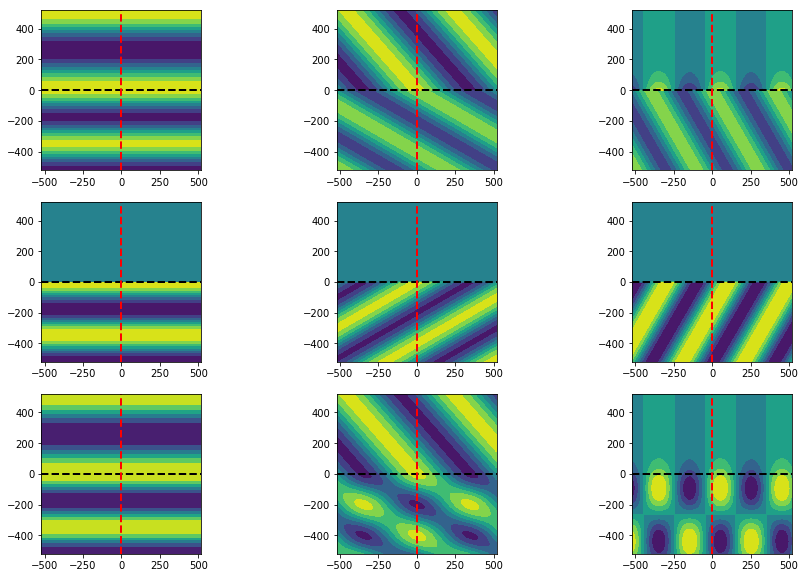

In [24]:
Etotal_zlist = VectorNamedTuple( Ep_TE.vx+En_TE.vx, Ep_TE.vy+En_TE.vy, Ep_TE.vz+En_TE.vz)
x_list = np.linspace( -520, 520, 100)
y_list = np.zeros( x_list.shape )
[x,z] = np.meshgrid( x_list, z_list)

Ep_x_xzlist, Ep_y_xzlist, Ep_z_xzlist = add_xy_term(Ep_TE, x_list, y_list, z_list, kx, ky, wt = 0.0)
Ep = np.array( [ Ep_x_xzlist[0], *Ep_y_xzlist[1:]], dtype=np.complex )

En_x_xzlist, Ep_n_xzlist, En_z_xzlist = add_xy_term(En_TE, x_list, y_list, z_list, kx, ky, wt = 0.0)
En = np.array( [ En_x_xzlist[0], *Ep_n_xzlist[1:]], dtype=np.complex )

Etotal_x_xzlist, Etotal_y_xzlist, Etotal_z_xzlist = add_xy_term(Etotal_zlist, x_list, y_list, z_list, kx, ky, wt = 0.0)
Etotal = np.array( [ Etotal_x_xzlist[0], *Etotal_y_xzlist[1:]], dtype=np.complex )

    
## plot figure
fig, ax = plt.subplots(3, kx.size)
for ii in range( kx.size ):
    ax[0, ii].contourf(x, z, np.real(Ep[ii,:,:]))
    ax[0, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[0, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[0, ii].set_aspect('equal', 'box')
    
    ax[1, ii].contourf(x, z, np.real(En[ii,:,:]))
    ax[1, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[1, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[1, ii].set_aspect('equal', 'box')
    
    ax[2, ii].contourf(x, z, np.real(Etotal[ii,:,:]))
    ax[2, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[2, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[2, ii].set_aspect('equal', 'box')

The 1st row shows the +z wave ($E_{\textbf{s},+}(x,y=0,z)$), 2nd row shows the -z wave ($E_{\textbf{s},-}(x,y=0,z)$), and the 3rd row shows the  $E_{\textbf{s}}(x,y=0,z)$. z=0 is the boundary. 1st column shows $0^o$ incidence, 2nd row shows $30^o$ incidence, and $60^o$ incidence. 

Interestingly, for $60^o$ incidence, although in material 2, the wave is exponenital decay along z direction, the wave still propagate along x, y direction.

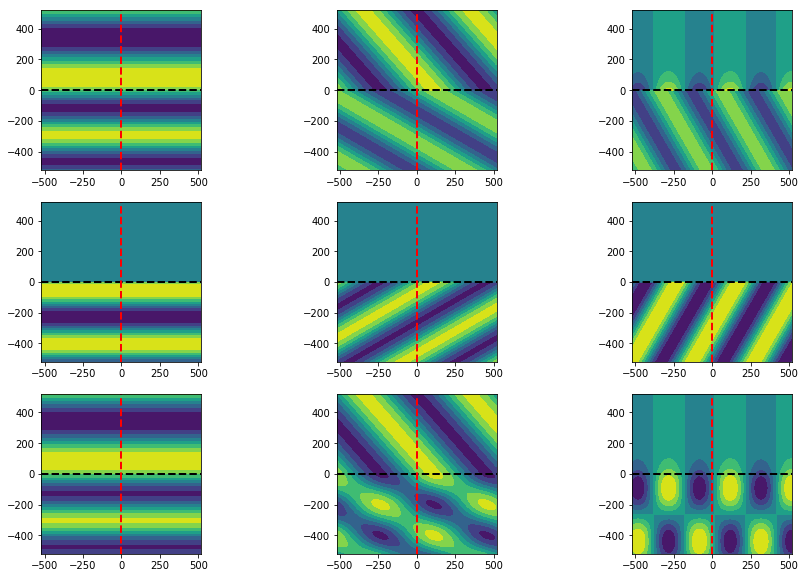

In [25]:
Etotal_zlist = VectorNamedTuple( Ep_TE.vx+En_TE.vx, Ep_TE.vy+En_TE.vy, Ep_TE.vz+En_TE.vz)
x_list = np.linspace( -520, 520, 100)
y_list = np.zeros( x_list.shape )
[x,z] = np.meshgrid( x_list, z_list)

Ep_x_xzlist, Ep_y_xzlist, Ep_z_xzlist = add_xy_term(Ep_TE, x_list, y_list, z_list, kx, ky, wt = 1.0)
Ep = np.array( [ Ep_x_xzlist[0], *Ep_y_xzlist[1:]], dtype=np.complex )

En_x_xzlist, Ep_n_xzlist, En_z_xzlist = add_xy_term(En_TE, x_list, y_list, z_list, kx, ky, wt = 1.0)
En = np.array( [ En_x_xzlist[0], *Ep_n_xzlist[1:]], dtype=np.complex )

Etotal_x_xzlist, Etotal_y_xzlist, Etotal_z_xzlist = add_xy_term(Etotal_zlist, x_list, y_list, z_list, kx, ky, wt = 1.0)
Etotal = np.array( [ Etotal_x_xzlist[0], *Etotal_y_xzlist[1:]], dtype=np.complex )

    
## plot figure
fig, ax = plt.subplots(3, kx.size)
for ii in range( kx.size ):
    ax[0, ii].contourf(x, z, np.real(Ep[ii,:,:]))
    ax[0, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[0, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[0, ii].set_aspect('equal', 'box')
    
    ax[1, ii].contourf(x, z, np.real(En[ii,:,:]))
    ax[1, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[1, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[1, ii].set_aspect('equal', 'box')
    
    ax[2, ii].contourf(x, z, np.real(Etotal[ii,:,:]))
    ax[2, ii].plot([np.min(x_list), np.max(x_list)], [0,0], 'k--', linewidth = 2)
    ax[2, ii].plot([0, 0], [np.min(z_list), np.max(z_list)], 'r--', linewidth = 2)
    ax[2, ii].set_aspect('equal', 'box')

Interestingly, at different time, for $60^o$ incidence, around z~-250 nm, the field is always zeors, showing that it is a real node. In constrast, the zero points along x-axis at t=0 is shifting toward +x direction.

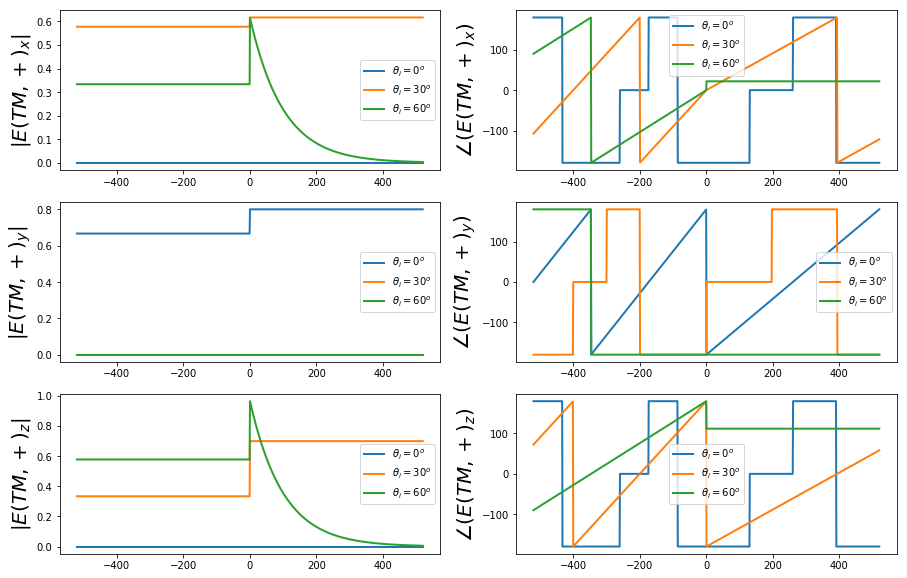

In [26]:
plot_field_z_fun(Ep_TM.vx, Ep_TM.vy, Ep_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TM,+)')

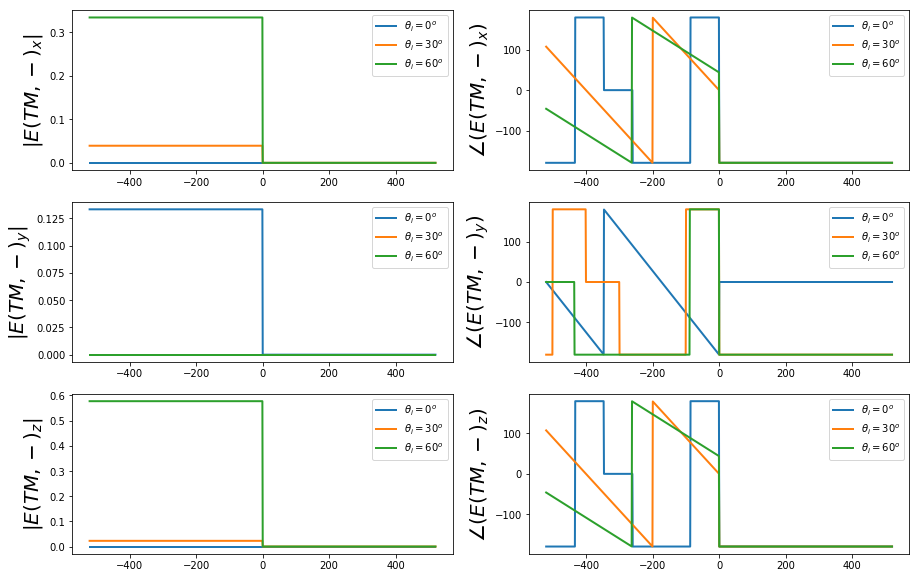

In [27]:
plot_field_z_fun(En_TM.vx, En_TM.vy, En_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TM,-)')

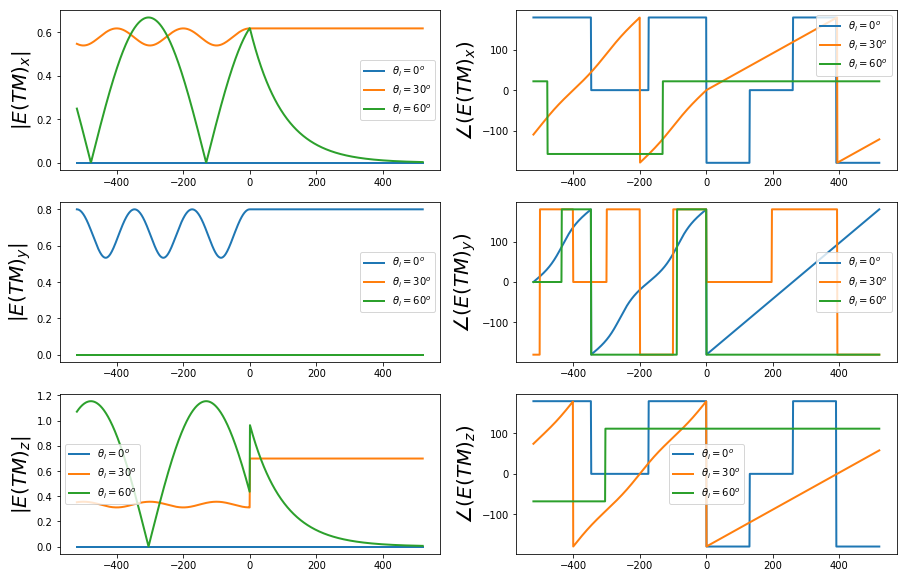

In [28]:
plot_field_z_fun(Ep_TM.vx+En_TM.vx, Ep_TM.vy+En_TM.vy, Ep_TM.vz+En_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'E(TM)')

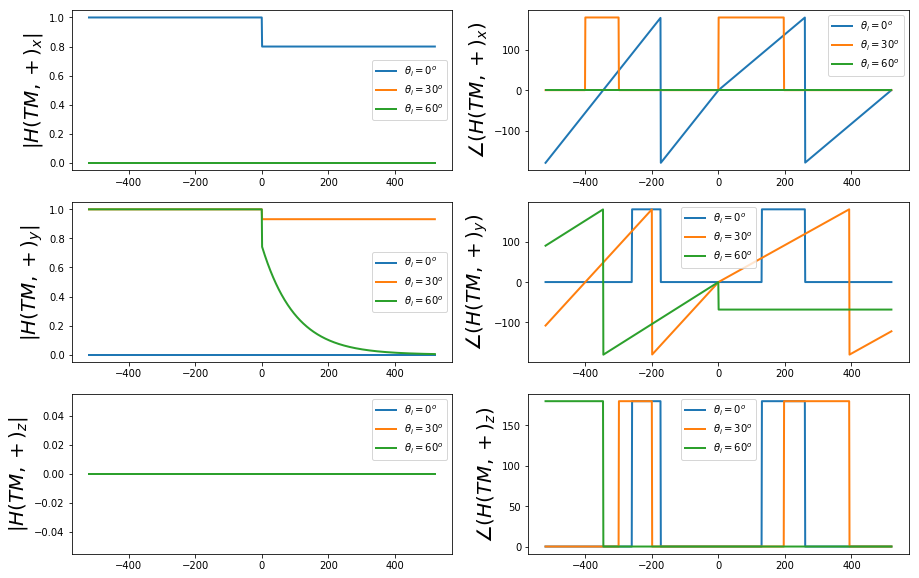

In [29]:
plot_field_z_fun(Hp_TM.vx, Hp_TM.vy, Hp_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TM,+)')

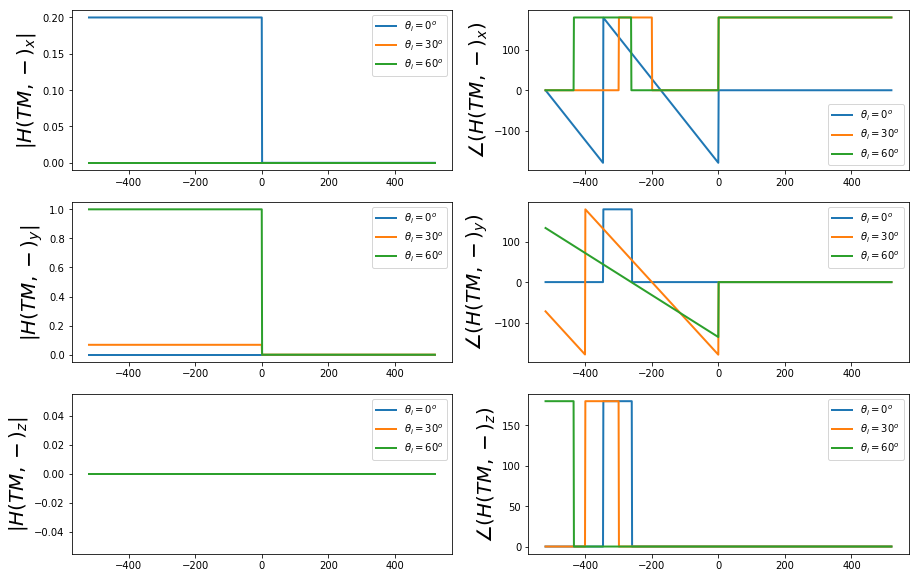

In [30]:
plot_field_z_fun(Hn_TM.vx, Hn_TM.vy, Hn_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TM,-)')

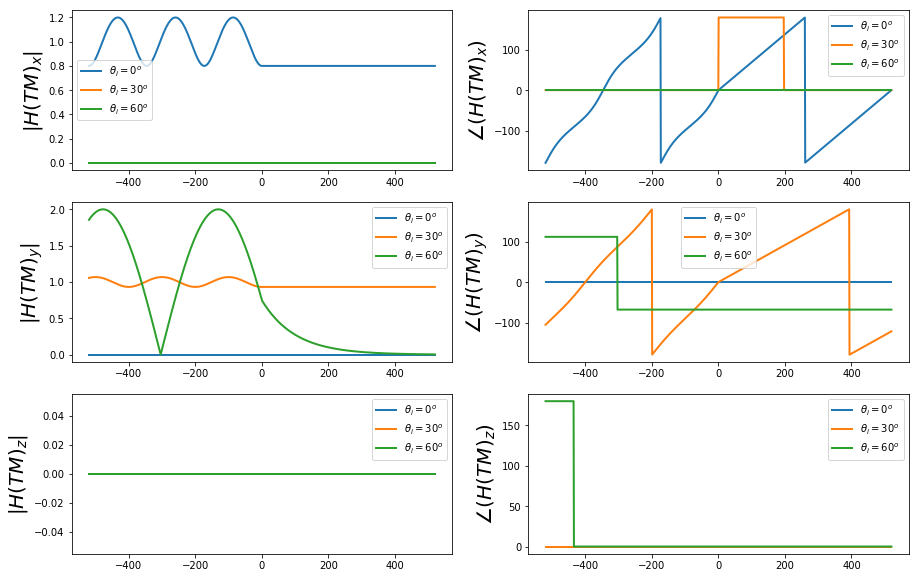

In [31]:
plot_field_z_fun(Hp_TM.vx+Hn_TM.vx, Hp_TM.vy+Hn_TM.vy, Hp_TM.vz+Hn_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'H(TM)')

You might be doubt that $E_z$ is not continuous on the interface but don't forget, the boundary conditions indicate in the normal direction, $D_z$ should be continuous not $E_z$.

In [32]:
e_list = (e0 * np.array(er_list, dtype=np.complex)[ LayerIndex ])
Dp_TM = VectorNamedTuple( *[Ep_TM[ii]*e_list[:,np.newaxis] for ii in range(3)] )
Dn_TM = VectorNamedTuple( *[En_TM[ii]*e_list[:,np.newaxis] for ii in range(3)] )

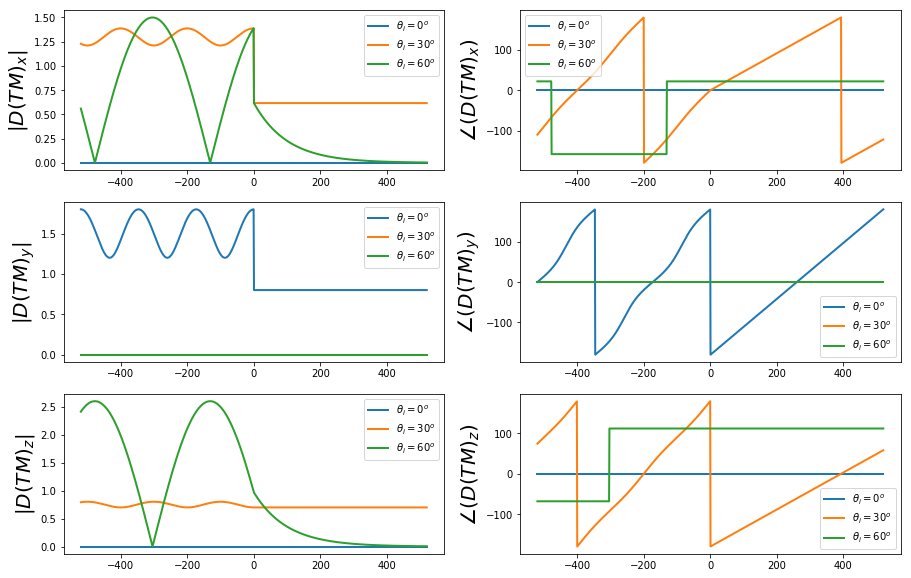

In [33]:
plot_field_z_fun(Dp_TM.vx+Dn_TM.vx, Dp_TM.vy+Dn_TM.vy, Dp_TM.vz+Dn_TM.vz, z_list, \
                 legend_list=legend_list, \
                 vecname=r'D(TM)')

See, $D_z$ is continuous on the interface.

This is the last part in **Lecture 6-4**. 
In this chapter, although it is hard, we finally finished all the derivation in transfer matrix method and derived the reflection coefficients and the transmission coefficients of TE mode and TM mode, respectively. Besides, we also discussed how to calculate all the field component at each z position and check whether they fit the boundary conditions and wave propagation. With this method, almost all the source free planar wave optics can be solved. In the following lectures, we will directly use the results in this important **Lecture**. 